In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from matplotlib.patches import Patch
import matplotlib.cm as cm
import numpy as np
import random

In [24]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(22,15)}) # set plot info

In [12]:
drug_matrix = pd.read_csv('../data/all_drug_distances_transformed.tsv', delimiter='\t', index_col='Drug')
drug_matrix.head()

,(+)-EPICATECHIN,(+)-SECOISOLARICIRESINOL,(-)-EPICATECHIN,(2-BENZHYDRYLOXYETHYL)DIETHYL-METHYLAMMONIUM IODIDE,(D)-SERINE,(R)-MELPHALAN,.ALPHA.-PYRROLIDINONONANOPHENONE,.ALPHA.-TOCOPHERYLOXYACETIC ACID,.ALPHA.1-PROTEINASE INHIBITOR HUMAN,"1-(3,4-DICHLOROPHENYL)-6-(METHOXYMETHYL)-3-AZABICYCLO[4.1.0]HEPTANE (ENANTIOMERIC MIX)",...,ZOTEPINE,ZOTIRACICLIB,ZSTK-474,ZUCAPSAICIN,ZUCLOPENTHIXOL,ZURANOLONE,ZURETINOL ACETATE,ZYH7,[18F]-FBA-A20FMDV2,[18F]FLUOROMISONIDAZOLE
Drug,,,,,,,,,,,,,,,,,,,,,
(+)-EPICATECHIN,1.000000,0.196738,0.375575,0.219998,0.176683,0.137945,0.192486,0.196738,0.079820,0.220529,...,0.212783,0.098700,0.223338,0.141454,0.189272,0.136456,0.170931,0.217655,0.195212,0.185721
(+)-SECOISOLARICIRESINOL,0.196738,1.000000,0.385528,0.812611,0.652618,0.481590,0.759208,1.000000,0.179937,0.814573,...,0.785960,0.401502,0.880895,0.340405,0.611769,0.409478,0.548384,0.701792,0.721059,0.755492
(-)-EPICATECHIN,0.375575,0.385528,1.000000,0.431109,0.346229,0.270317,0.377197,0.385528,0.123345,0.432150,...,0.416970,0.193413,0.437655,0.277193,0.358825,0.240174,0.334957,0.372317,0.429311,0.408437
(2-BENZHYDRYLOXYETHYL)DIETHYL-METHYLAMMONIUM IODIDE,0.219998,0.812611,0.431109,1.000000,0.729777,0.504326,0.795051,0.812611,0.221430,0.910880,...,0.878884,0.448642,0.922483,0.380651,0.684098,0.457890,0.613219,0.784765,0.806309,0.767106
(D)-SERINE,0.176683,0.652618,0.346229,0.729777,1.000000,0.405031,0.638516,0.652618,0.161595,0.742936,...,0.830345,0.327409,0.740858,0.305706,0.652589,0.373467,0.492484,0.630255,0.647557,0.616073


In [13]:
reducer = umap.UMAP() # create UMAP object
data = drug_matrix[list(drug_matrix.columns)].values # get data we want to use
embedding = reducer.fit_transform(data) # train the reducer, letting it learn about the manifold
embedding.shape

(7435, 2)

In [54]:
consensus = pd.read_csv('drug_clusters/all_drugs-1-iter-consensus.tsv', delimiter='\t')

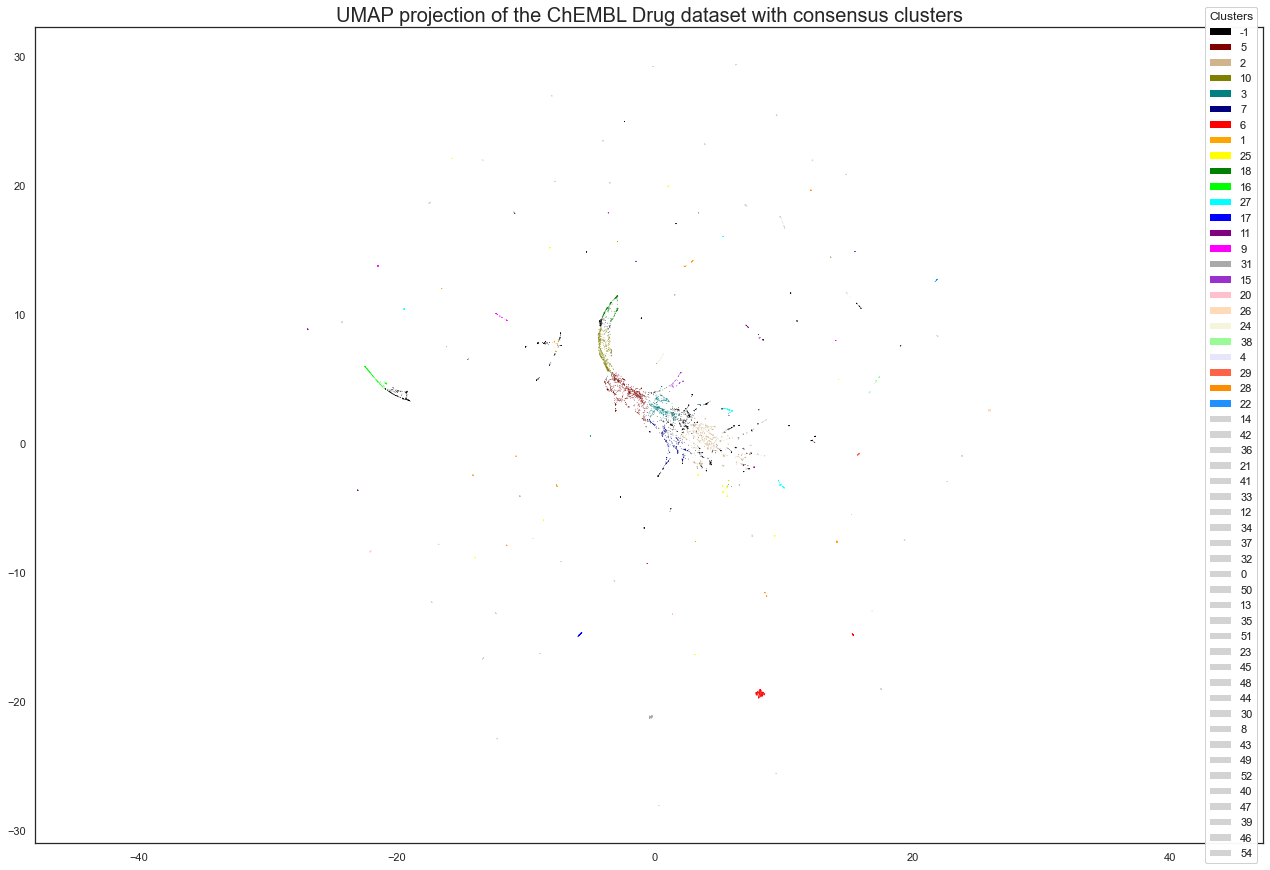

In [67]:
# colors = np.random.rand(consensus['Cluster'].nunique(),3)
colors = ['black', 'maroon', 'tan', 'olive', 'teal', 
        'navy', 'red', 'orange', 'yellow', 'green', 
        'lime', 'cyan', 'blue', 'purple', 'magenta', 
        'darkgrey', 'darkorchid', 'pink', 'peachpuff', 'beige', 
        'palegreen', 'lavender', 'tomato', 'darkorange', 'dodgerblue']

n = consensus['Cluster'].nunique() - len(colors)
the_rest = ['lightgrey'] * n

colors.extend(the_rest)

sorted_cluster_labels = consensus.groupby(['Cluster'])['Drug'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)['Cluster'].tolist()

colorkey = dict(zip(sorted_cluster_labels, colors[:consensus['Cluster'].nunique()])) #cm.get_cmap('nipy_spectral', consensus['Cluster'].nunique()).colors))
handles = [Patch(facecolor=colorkey[name]) for name in colorkey]
legend = plt.legend(handles, colorkey, title='Clusters', loc='right')
c = consensus['Cluster'].map(colorkey).tolist()

# plot UMAP
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=0.75,
    c=c) #[sns.color_palette('hls', consensus['Cluster'].nunique())[x] for x in consensus['Cluster']])
plt.gca().set_aspect('equal', 'datalim')
plt.gca().add_artist(legend)
plt.title(f'UMAP projection of the ChEMBL Drug dataset with consensus clusters', fontsize=20)
plt.savefig('all_drugs_umap_sorted_clusters.png', dpi=500)

In [56]:
# what is the number of drugs in each cluster?
consensus.groupby('Cluster').count()

,Drug
Cluster,
-1,1363
0,46
1,219
2,678
3,378
4,74
5,700
6,293
7,308


In [65]:
consensus.groupby(['Cluster'])['Drug'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)['Cluster'].tolist()

[-1,
 5,
 2,
 10,
 3,
 7,
 6,
 1,
 25,
 18,
 16,
 27,
 17,
 11,
 9,
 31,
 15,
 20,
 26,
 24,
 38,
 4,
 29,
 28,
 22,
 14,
 42,
 36,
 21,
 41,
 33,
 12,
 34,
 37,
 32,
 0,
 50,
 13,
 35,
 51,
 23,
 45,
 48,
 44,
 30,
 8,
 43,
 49,
 52,
 40,
 47,
 39,
 46,
 54]

In [59]:
consensus['Cluster'].unique()

array([10, 22,  3, 42, 41, 24, 30, 20, 15, -1,  6,  2, 26, 36,  9,  1, 11,
       27,  5,  7, 28, 25, 16, 32, 38, 44,  0, 33,  4, 21, 23, 37, 13,  8,
       34, 17, 45, 49, 12, 18, 43, 29, 52, 39, 14, 50, 31, 46, 54, 40, 47,
       48, 51, 35])